# import the data

In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv('Epileptic Seizure Recognition.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [5]:
data.head()

Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  
3   -80   -77   -85   -77   -72   -69   -65  5  
4   -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 180 columns]

# Data visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

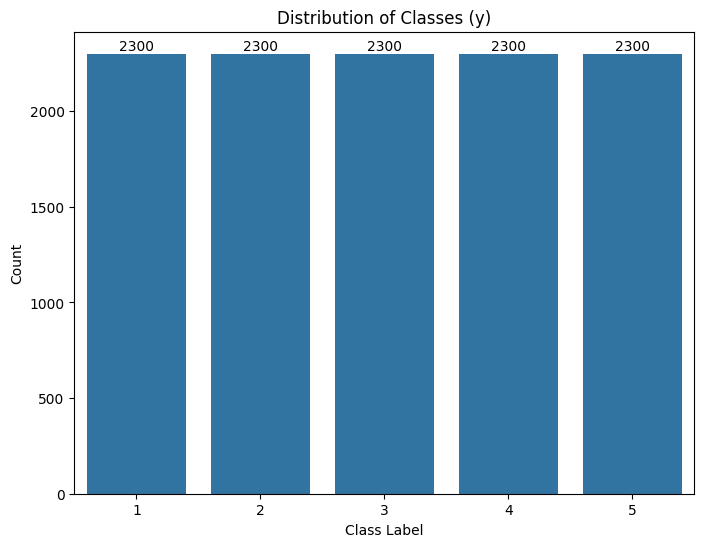

In [8]:

plt.figure(figsize=(8,6))
ax = sns.countplot(x='y', data=data)
plt.title('Distribution of Classes (y)')
plt.xlabel('Class Label')
plt.ylabel('Count')

# Add numeric values on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', fontsize=10)

plt.show()


In [9]:
corr = data.iloc[:, 1:-1].corr()

# Show the first few rows for readability
print(corr.head())
corr.style.background_gradient(cmap='vlag').format("{:.2f}")

          X1        X2        X3        X4        X5        X6        X7  \
X1  1.000000  0.947729  0.808192  0.608109  0.393674  0.218226  0.103693   
X2  0.947729  1.000000  0.944623  0.790403  0.576579  0.369803  0.211793   
X3  0.808192  0.944623  1.000000  0.939522  0.778648  0.573874  0.382493   
X4  0.608109  0.790403  0.939522  1.000000  0.938636  0.784954  0.590497   
X5  0.393674  0.576579  0.778648  0.938636  1.000000  0.941267  0.792304   

          X8        X9       X10  ...      X169      X170      X171      X172  \
X1  0.044483  0.027923  0.032221  ...  0.006206  0.027263  0.045401  0.051630   
X2  0.109478  0.060218  0.043565  ... -0.001270  0.012602  0.025937  0.031606   
X3  0.231084  0.133249  0.080003  ... -0.002198  0.004575  0.011752  0.016424   
X4  0.399855  0.250052  0.150284  ... -0.000491 -0.001028  0.000632  0.006617   
X5  0.596424  0.410651  0.265112  ...  0.011613  0.004861  0.000918  0.006488   

        X173      X174      X175      X176      X177    

In [10]:
threshold = 0.8  # show only strong correlations
strong_corr = corr[(corr >= threshold) | (corr <= -threshold)]

# Print the filtered correlations
print(strong_corr.dropna(how='all').dropna(axis=1, how='all'))


            X1        X2        X3        X4        X5        X6  X7  X8  X9  \
X1    1.000000  0.947729  0.808192       NaN       NaN       NaN NaN NaN NaN   
X2    0.947729  1.000000  0.944623       NaN       NaN       NaN NaN NaN NaN   
X3    0.808192  0.944623  1.000000  0.939522       NaN       NaN NaN NaN NaN   
X4         NaN       NaN  0.939522  1.000000  0.938636       NaN NaN NaN NaN   
X5         NaN       NaN       NaN  0.938636  1.000000  0.941267 NaN NaN NaN   
...        ...       ...       ...       ...       ...       ...  ..  ..  ..   
X174       NaN       NaN       NaN       NaN       NaN       NaN NaN NaN NaN   
X175       NaN       NaN       NaN       NaN       NaN       NaN NaN NaN NaN   
X176       NaN       NaN       NaN       NaN       NaN       NaN NaN NaN NaN   
X177       NaN       NaN       NaN       NaN       NaN       NaN NaN NaN NaN   
X178       NaN       NaN       NaN       NaN       NaN       NaN NaN NaN NaN   

      X10  ...  X169  X170  X171  X172 

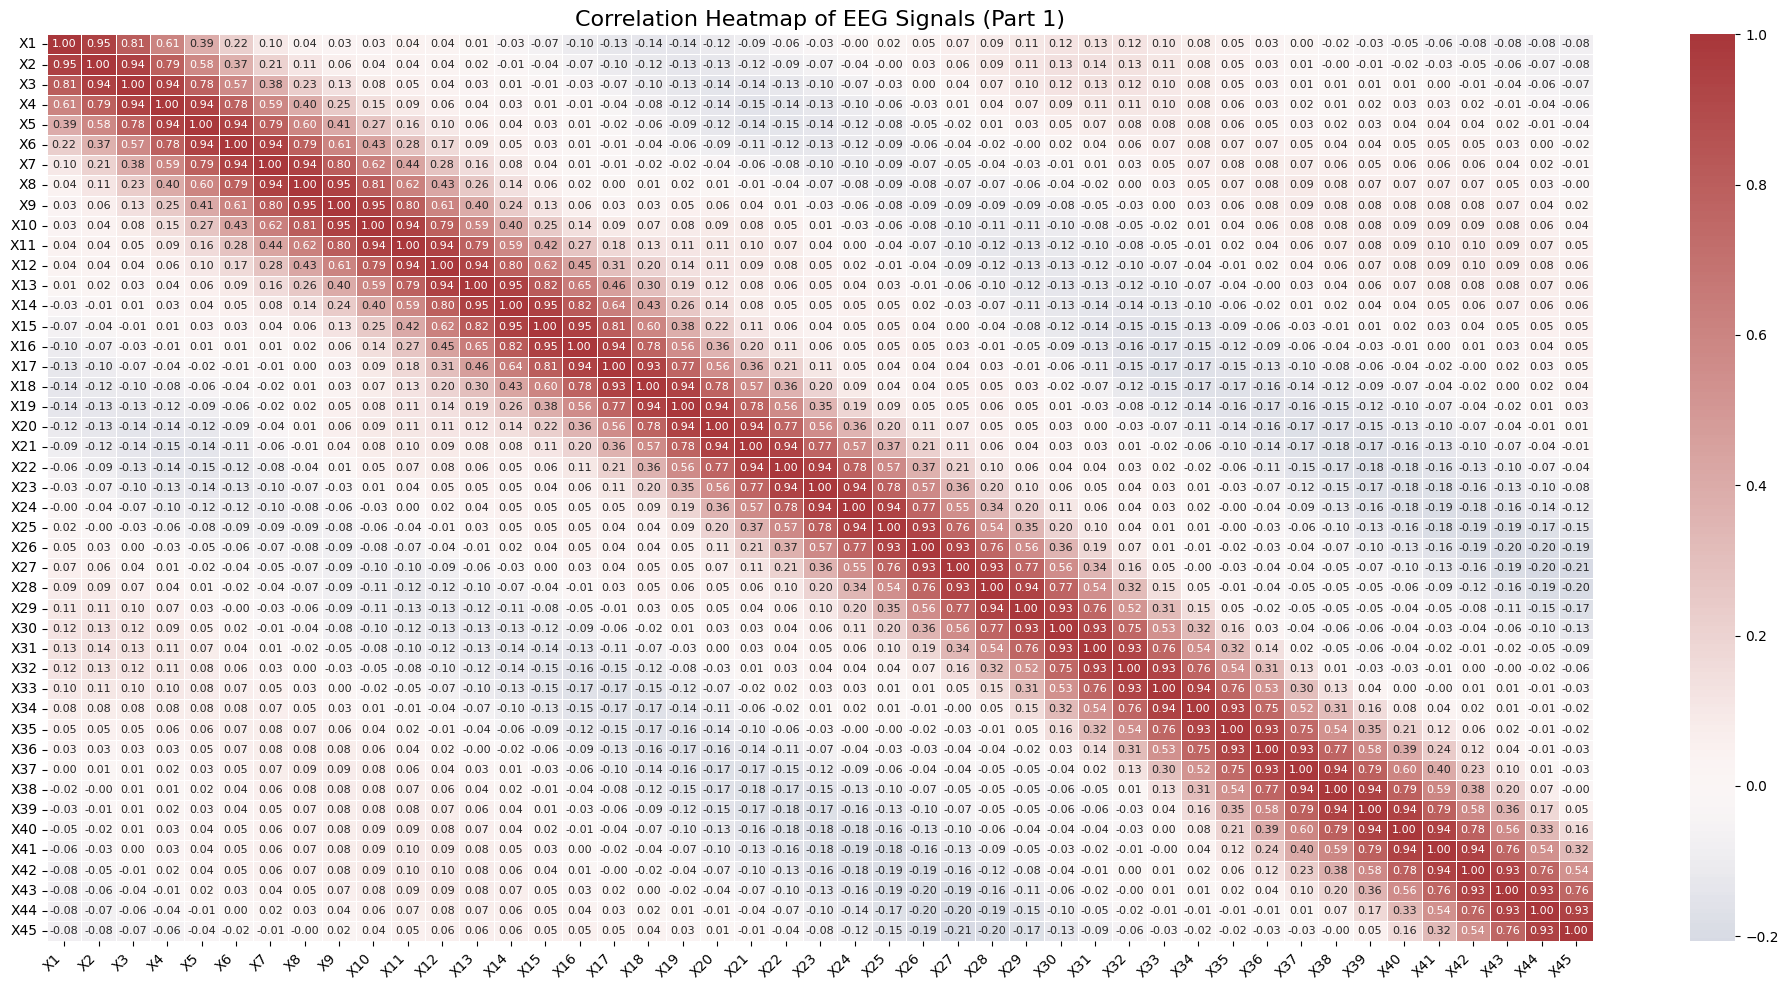

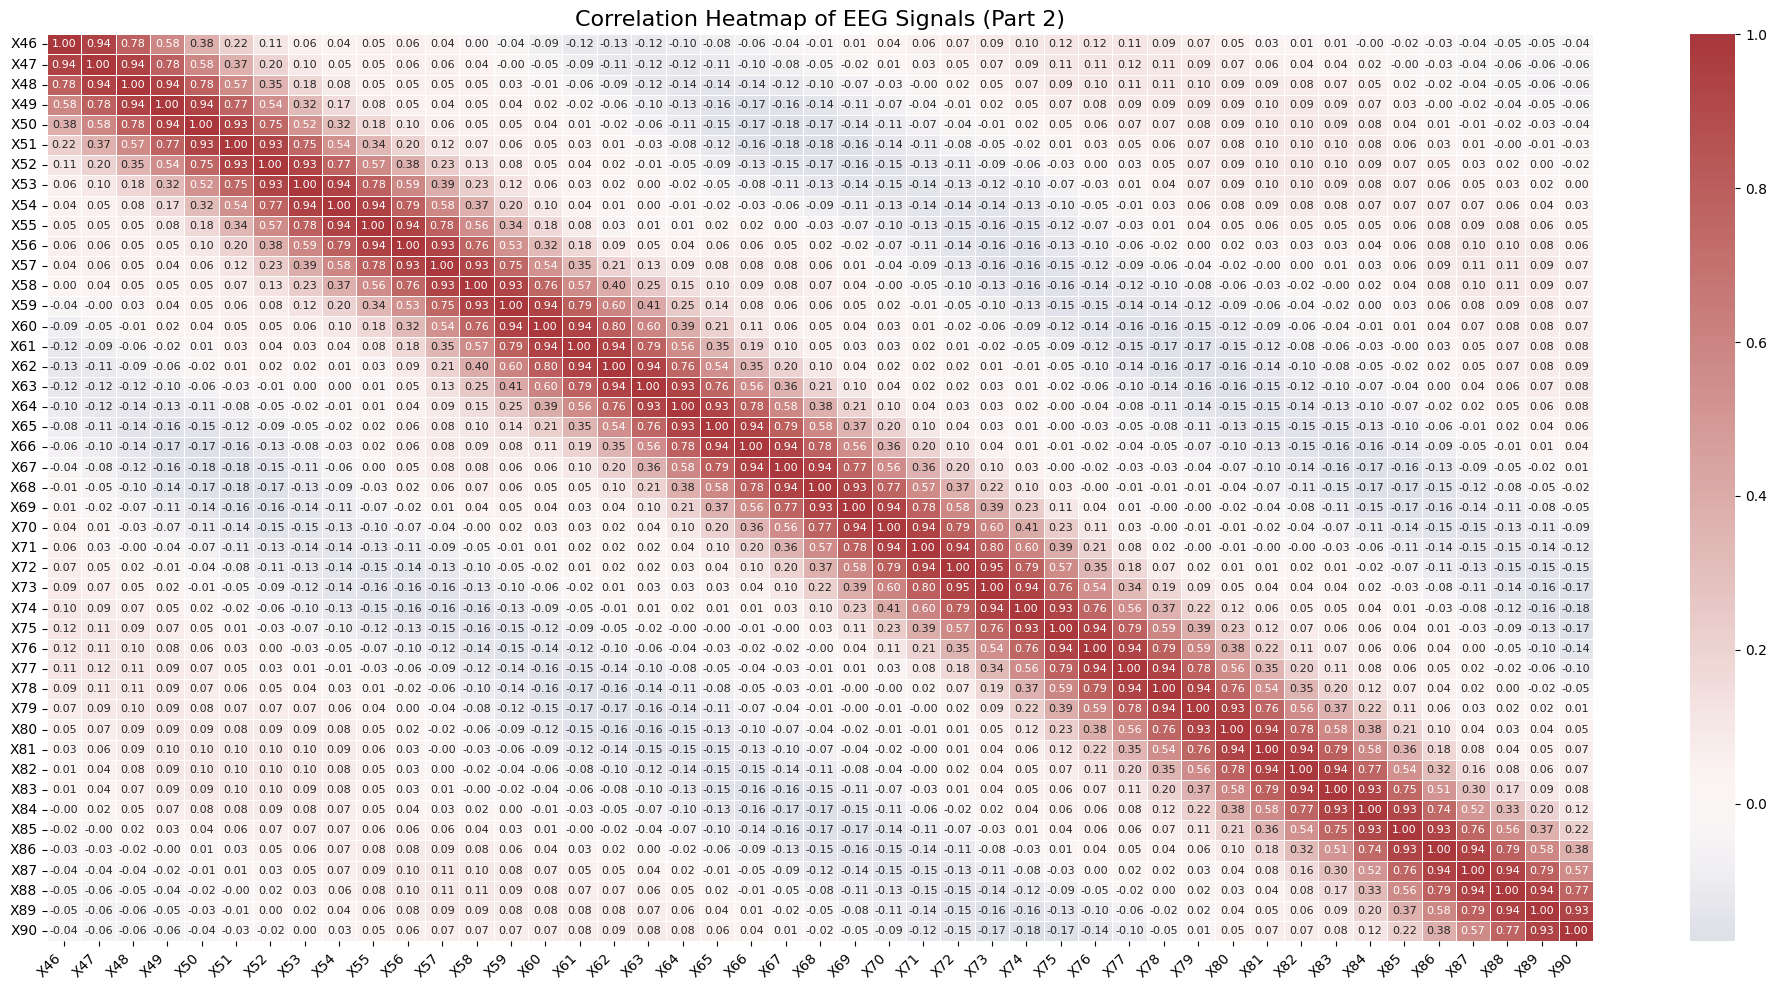

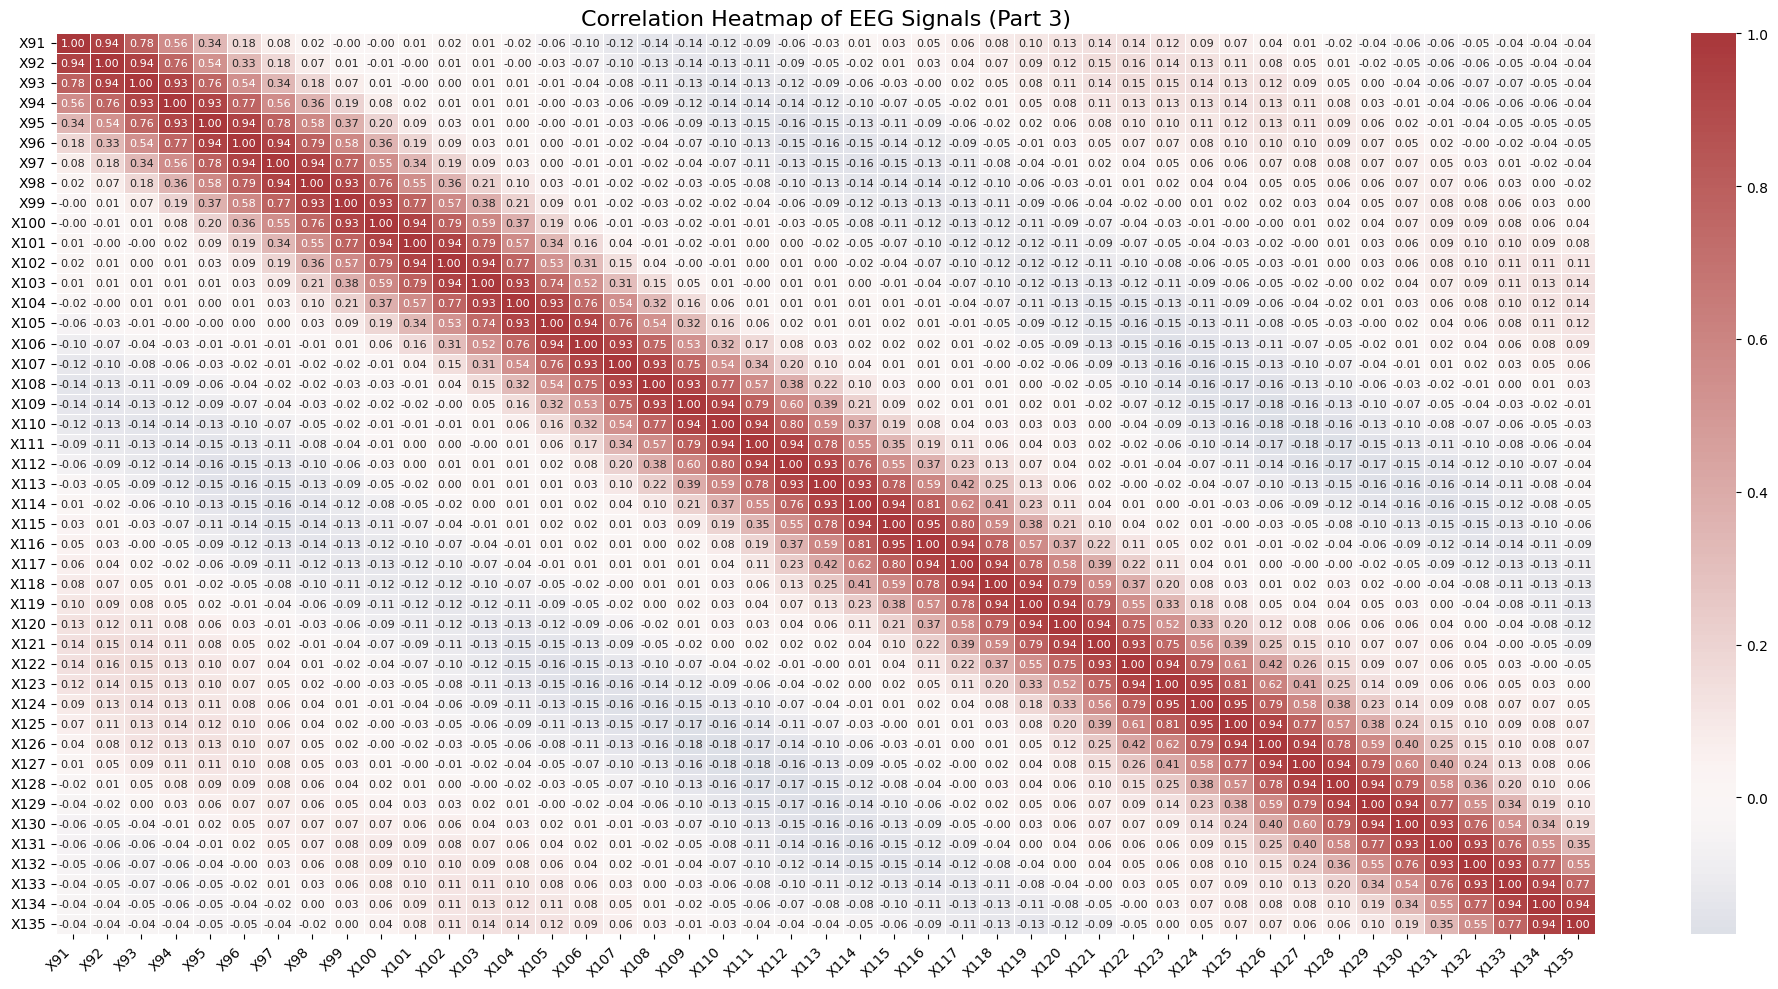

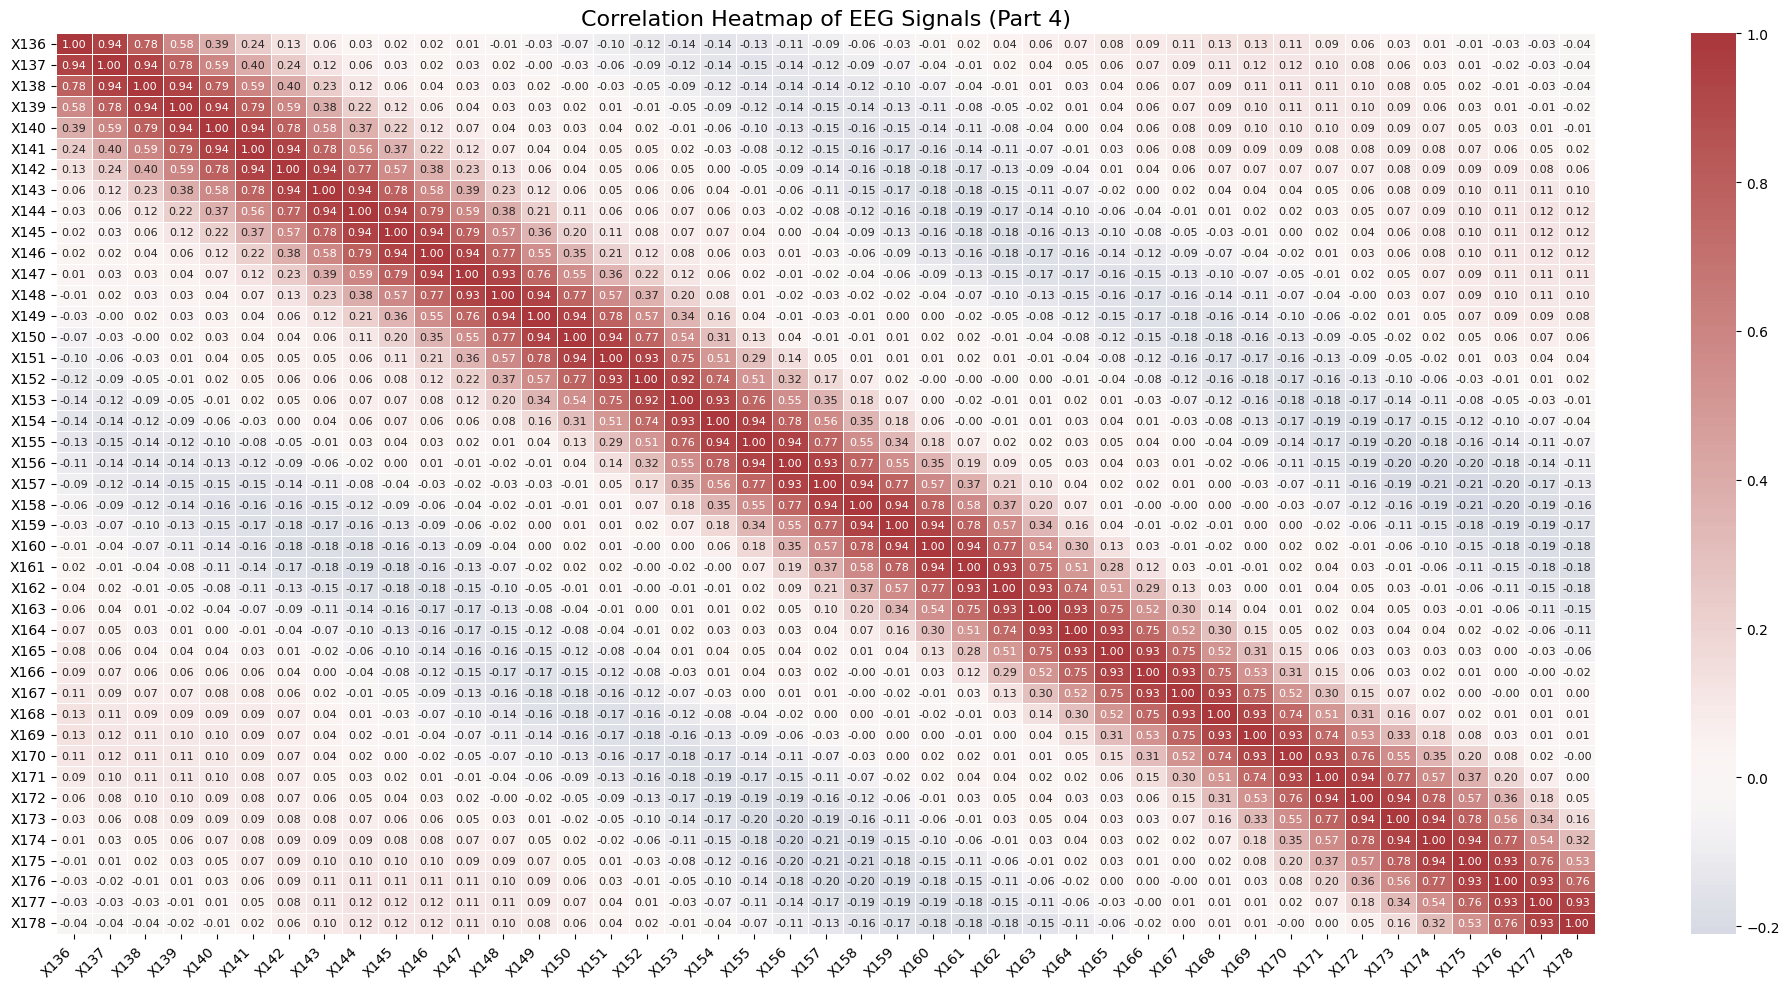

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr = data.iloc[:, 1:-1].corr()
features = corr.columns
n = len(features)

# Define how many parts we want
num_parts = 4
step = n // num_parts + 1  # ensures all columns are covered

# Plot each part with larger x-axis
for i in range(num_parts):
    start = i * step
    end = min((i + 1) * step, n)
    subset_features = features[start:end]
    
    plt.figure(figsize=(20,10))  # Wider figure for larger x-axis
    sns.heatmap(corr.loc[subset_features, subset_features], 
                cmap='vlag', center=0, annot=True, fmt=".2f", linewidths=0.5,
                annot_kws={"size": 8})  # Adjust annotation size if needed
    
    plt.title(f'Correlation Heatmap of EEG Signals (Part {i+1})', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()


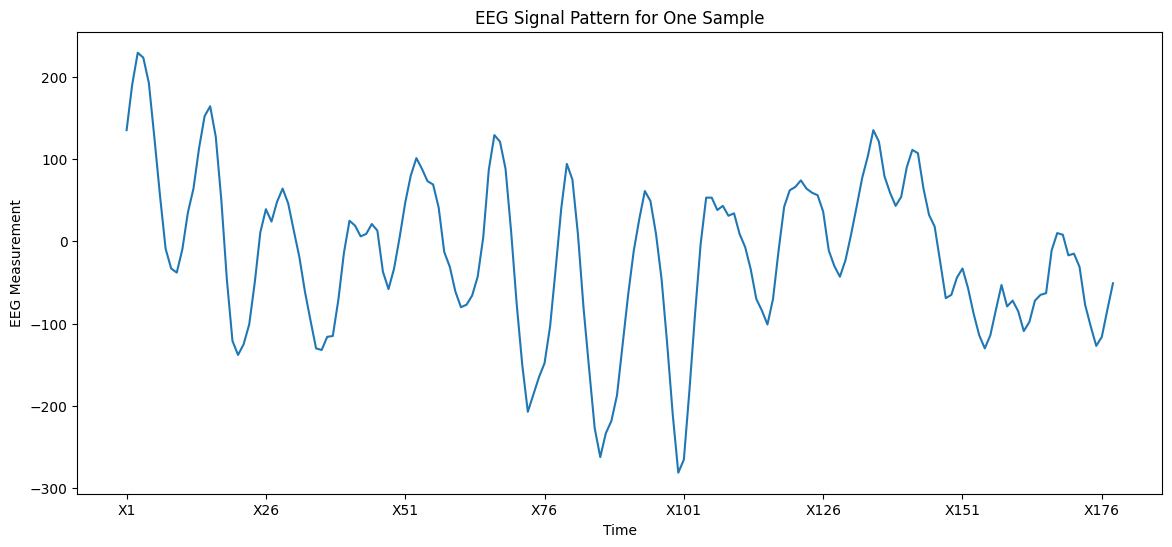

In [12]:
plt.figure(figsize=(14,6))
sample = data.iloc[0, 1:-1]
sample.plot()
plt.title('EEG Signal Pattern for One Sample')
plt.xlabel('Time')
plt.ylabel('EEG Measurement')
plt.show()

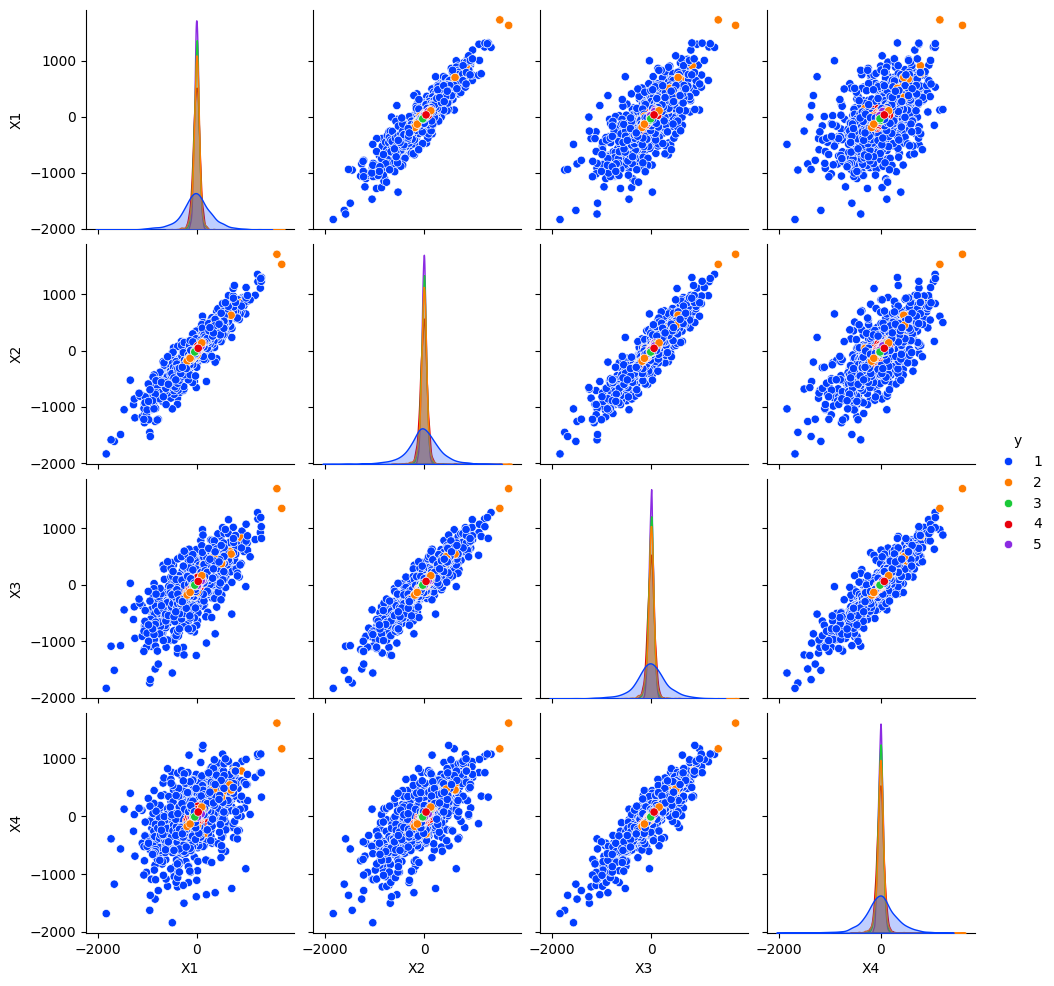

In [13]:
selected_cols = ['X1', 'X2', 'X3', 'X4', 'y']
sns.pairplot(data[selected_cols], hue='y', palette='bright')
plt.show()


#  Data preprocessing 

In [15]:
# Check if any value is missing
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [16]:
import pandas as pd

# Show data types of each column
print("Column Data Types:")
print(data.dtypes)

# Check for missing values in each column
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:")
print(data.duplicated().sum())


Column Data Types:
Unnamed    object
X1          int64
X2          int64
X3          int64
X4          int64
            ...  
X175        int64
X176        int64
X177        int64
X178        int64
y           int64
Length: 180, dtype: object

Missing Values in Each Column:
Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

Number of Duplicate Rows:
0


In [17]:
X = data.iloc[:, 1:-1]  # All EEG columns except ID and target
y = data['y']            # Target column


In [18]:
X

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X169  X170  \
0      135  190  229  223  192  125   55   -9  -33  -38  ...     8   -17   
1      386  382  356  331  320  315  307  272  244  232  ...   168   164   
2      -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    29    57   
3     -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -80   -82   
4       -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...    10     4   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
11495  -22  -22  -23  -26  -36  -42  -45  -42  -45  -49  ...    20    15   
11496  -47  -11   28   77  141  211  246  240  193  136  ...   -94   -65   
11497   14    6  -13  -16   10   26   27   -9    4   14  ...   -42   -65   
11498  -40  -25   -9  -12   -2   12    7   19   22   29  ...   114   121   
11499   29   41   57   72   74   62   54   43   31   23  ...   -94   -59   

       X171  X172  X173  X174  X175  X176  X177  X178  
0       -15   -31   -77  -103  -127  -116   -83   -51  
1       150   146   152   157   156   154   143   129  
2        64    48    19   -12   -30   -35   -35   -36  
3       -81   -80   -77   -85   -77   -72   -69   -65  
4         2   -12   -32   -41   -65   -83   -89   -73  
...     ...   ...   ...   ...   ...   ...   ...   ...  
11495    16    12     5    -1   -18   -37   -47   -48  
11496   -33    -7    14    27    48    77   117   170  
11497   -48   -61   -62   -67   -30    -2    -1    -8  
11498   135   148   143   116    86    68    59    55  
11499   -25    -4     2     5     4    -2     2    20  

[11500 rows x 178 columns]

In [19]:
y

0        4
1        1
2        5
3        5
4        5
        ..
11495    2
11496    1
11497    5
11498    3
11499    4
Name: y, Length: 11500, dtype: int64

# Feature Scaling (Standardization)

In [21]:
# Different features have different units and ranges, which can affect model training.

# StandardScaler scales features to have:
# ✔ A mean of 0
# ✔ A standard deviation of 1 

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
X_scaled

array([[ 0.88505134,  1.20992878,  1.46276429, ..., -0.63414367,
        -0.43329036, -0.23539922],
       [ 2.40057718,  2.36619038,  2.23944096, ...,  1.02342937,
         0.95424076,  0.85653664],
       [-0.12328657, -0.16915405, -0.22513147, ..., -0.13687176,
        -0.13859348, -0.14440456],
       ...,
       [ 0.1544592 ,  0.10184476, -0.01720228, ...,  0.0657205 ,
         0.07015014,  0.02545213],
       [-0.17159018, -0.08484331,  0.00725997, ...,  0.49546166,
         0.43852123,  0.40762968],
       [ 0.24502848,  0.31262161,  0.41088722, ...,  0.0657205 ,
         0.08856869,  0.19530882]])

In [24]:
# Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
X_train

array([[-0.32857692, -0.3859531 , -0.51867856, ...,  0.57527073,
        -0.10789589, -0.6357757 ],
       [-0.39499439, -0.23539821, -0.15786026, ...,  0.46476587,
         0.54903256,  0.37123182],
       [-0.37688054, -0.33777554, -0.29240268, ...,  0.49546166,
         0.530614  ,  0.49862433],
       ...,
       [ 0.61334352,  0.22228867, -0.29240268, ...,  0.17008621,
        -0.08333782, -0.36279173],
       [ 0.61938147,  0.54146505,  0.39865609, ...,  1.44703137,
         1.50065789,  1.46316767],
       [-0.20781789,  0.16206672,  0.30692263, ..., -0.25351579,
        -0.41487181, -0.47198532]])

In [26]:
X_test

array([[ 0.03973812, -0.01257696,  0.03783779, ...,  0.01660723,
         0.01489447, -0.01701204],
       [-0.16555223, -0.12699868, -0.0661268 , ..., -0.49908216,
        -0.20612819,  0.08004892],
       [ 0.76429231,  0.70406434,  0.30080706, ..., -0.01408857,
        -0.04650071,  0.01331951],
       ...,
       [-0.33461488, -0.41606408, -0.53090969, ...,  0.58140989,
         0.60428822,  0.5956853 ],
       [ 1.7001748 ,  1.72181543,  1.37103082, ..., -0.97179744,
        -1.17003255, -1.19994256],
       [ 0.28729414,  0.10184476, -0.18232252, ...,  0.44020923,
         0.43852123,  0.32876764]])

In [27]:
y_test

5556     5
1570     4
2582     4
4948     5
7089     5
        ..
10899    1
2152     5
10462    3
4519     1
6572     5
Name: y, Length: 2300, dtype: int64

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [29]:
X_train

array([[-0.32857692, -0.3859531 , -0.51867856, ...,  0.57527073,
        -0.10789589, -0.6357757 ],
       [-0.39499439, -0.23539821, -0.15786026, ...,  0.46476587,
         0.54903256,  0.37123182],
       [-0.37688054, -0.33777554, -0.29240268, ...,  0.49546166,
         0.530614  ,  0.49862433],
       ...,
       [ 0.61334352,  0.22228867, -0.29240268, ...,  0.17008621,
        -0.08333782, -0.36279173],
       [ 0.61938147,  0.54146505,  0.39865609, ...,  1.44703137,
         1.50065789,  1.46316767],
       [-0.20781789,  0.16206672,  0.30692263, ..., -0.25351579,
        -0.41487181, -0.47198532]])

# implementation from logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [32]:
# Predict the labels for the test set
y_pred = model.predict(X_test)


In [33]:
from sklearn.metrics import accuracy_score

# Compare the predicted values with the actual labels
accuracy_logistic = accuracy_score(y_test, y_pred)

print(f"Test Set Accuracy: {accuracy_logistic:.4f}")


Test Set Accuracy: 0.2565


# using Random Forest 

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [36]:
# Train the model on the training set
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [37]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)


In [38]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Set Accuracy: {accuracy_rf:.4f}")


Random Forest Test Set Accuracy: 0.7026


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix:
[[448   4   3  10   0]
 [ 18 254 129  15  43]
 [  5 111 255  17  62]
 [  1   8   7 345  96]
 [  0  28  51  76 314]]

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.96      0.96       465
           2       0.63      0.55      0.59       459
           3       0.57      0.57      0.57       450
           4       0.75      0.75      0.75       457
           5       0.61      0.67      0.64       469

    accuracy                           0.70      2300
   macro avg       0.70      0.70      0.70      2300
weighted avg       0.70      0.70      0.70      2300



# using svm


In [41]:
from sklearn.svm import SVC

# Create the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)


In [42]:
# Train the SVM model on the training set
svm_model.fit(X_train, y_train)


SVC(random_state=42)

In [43]:
# Predict on the test set
y_pred_svm = svm_model.predict(X_test)


In [44]:
from sklearn.metrics import accuracy_score

# Measure how well the model performs
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Set Accuracy: {accuracy_svm:.4f}")


SVM Test Set Accuracy: 0.5696


In [45]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Confusion Matrix:
[[444  13   2   5   1]
 [ 19  97  90  12 241]
 [  0  54 124  15 257]
 [  1  28  38 237 153]
 [  0  11  22  28 408]]

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.95      0.96       465
           2       0.48      0.21      0.29       459
           3       0.45      0.28      0.34       450
           4       0.80      0.52      0.63       457
           5       0.38      0.87      0.53       469

    accuracy                           0.57      2300
   macro avg       0.61      0.57      0.55      2300
weighted avg       0.61      0.57      0.55      2300



In [46]:
# for multiple kernal 

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    # Create and train the model with the chosen kernel
    model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the result
    results[kernel] = accuracy
    print(f"Kernel: {kernel}, Accuracy: {accuracy:.4f}")


Kernel: linear, Accuracy: 0.2687
Kernel: poly, Accuracy: 0.2743
Kernel: rbf, Accuracy: 0.5696
Kernel: sigmoid, Accuracy: 0.2078


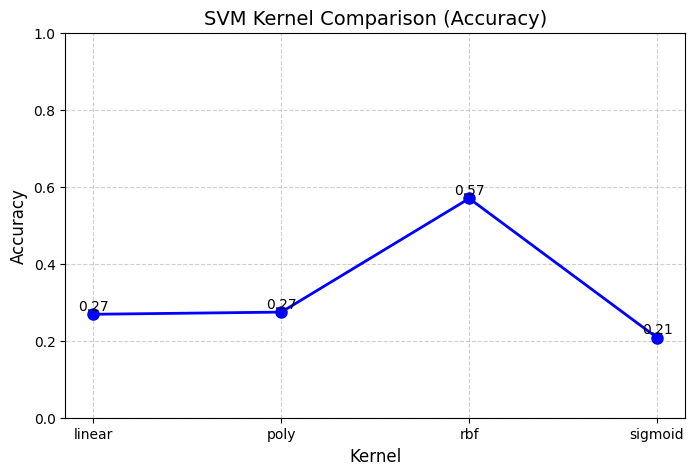

In [48]:
import matplotlib.pyplot as plt

# Convert results to lists
kernels = list(results.keys())
accuracies = list(results.values())

# Plot line graph
plt.figure(figsize=(8,5))
plt.plot(kernels, accuracies, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)

# Add labels and title
plt.title("SVM Kernel Comparison (Accuracy)", fontsize=14)
plt.xlabel("Kernel", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)  # keep y-axis between 0 and 1
plt.grid(True, linestyle='--', alpha=0.6)

# Annotate accuracy values on points
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10)

plt.show()


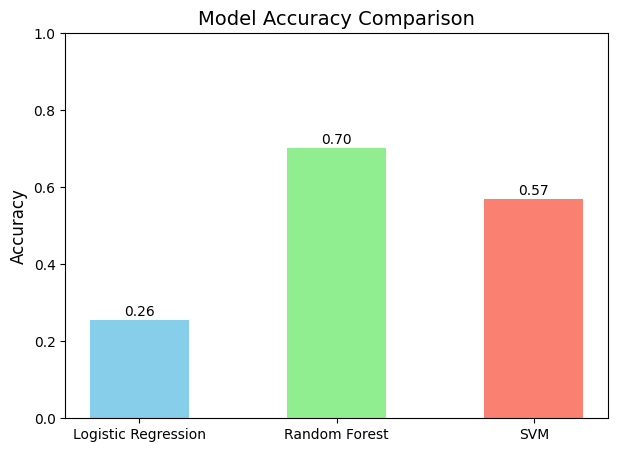

In [49]:
import matplotlib.pyplot as plt

# Suppose you already have the accuracies
logistic_accuracy = accuracy_logistic
rf_accuracy =accuracy_rf
svm_accuracy = accuracy_svm

# Store in dictionary
results = {
    "Logistic Regression": logistic_accuracy,
    "Random Forest": rf_accuracy,
    "SVM": svm_accuracy
}

# Plot bar graph
plt.figure(figsize=(7,5))
plt.bar(results.keys(), results.values(), color=['skyblue','lightgreen','salmon'], width=0.5)

# Add labels and title
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0,1)

# Annotate accuracy values on bars
for i, (model, acc) in enumerate(results.items()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10)

plt.show()


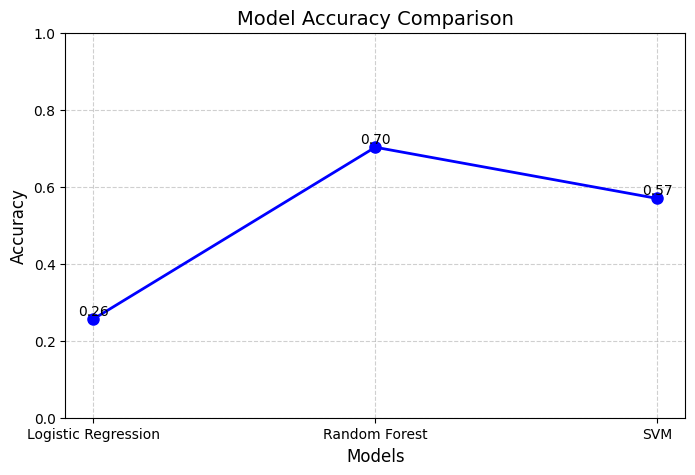

In [50]:
import matplotlib.pyplot as plt

# Example accuracies
logistic_accuracy = accuracy_logistic
rf_accuracy =accuracy_rf
svm_accuracy = accuracy_svm

# Data
models = ["Logistic Regression", "Random Forest", "SVM"]
accuracies = [logistic_accuracy, rf_accuracy, svm_accuracy]

# Plot line graph
plt.figure(figsize=(8,5))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)

# Labels and title
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)

# Annotate values
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10)

plt.show()


# using cnn

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

# Reshape data for 1D CNN
# CNN expects (samples, timesteps, channels)
x_train_cnn = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_cnn = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

# Build CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(y_train.unique()), activation='softmax')  # Multi-class classification
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(
    x_train_cnn, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_test_cnn, y_test),
    verbose=1
)

# Evaluate
test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


ModuleNotFoundError: No module named 'tensorflow'